In [47]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import os
from pathlib import Path
from matplotlib import pyplot as plt

In [48]:
data_folder = Path("../data/regression_windfarm/")

inputs = np.load(data_folder / "inputs.npy")
labels = np.load(data_folder / "labels.npy")
X_train, X_test, y_train, y_test = model_selection.train_test_split(inputs, labels, test_size=0.30, random_state=42)

## Linear regression

In [49]:
regr = LinearRegression().fit(X_train, y_train)


In [50]:
scores = model_selection.cross_val_score(regr, X_train, y_train, cv=5)
print(scores)

[ 0.35220839  0.10752322  0.40924719 -0.0946135   0.5827605 ]


In [51]:
prediction = regr.predict(X_test)
print(r2_score(y_test, prediction))

0.7257397173629533


## Tree

In [52]:
regr = tree.DecisionTreeRegressor().fit(X_train, y_train)

In [53]:
scores = model_selection.cross_val_score(regr, X_train, y_train, cv=5)
print(scores)

[ 0.00593532 -0.75117524  0.26176142 -0.17654449  0.04611048]


In [54]:
prediction = regr.predict(X_test)
print(r2_score(y_test, prediction))

0.009045528961976745


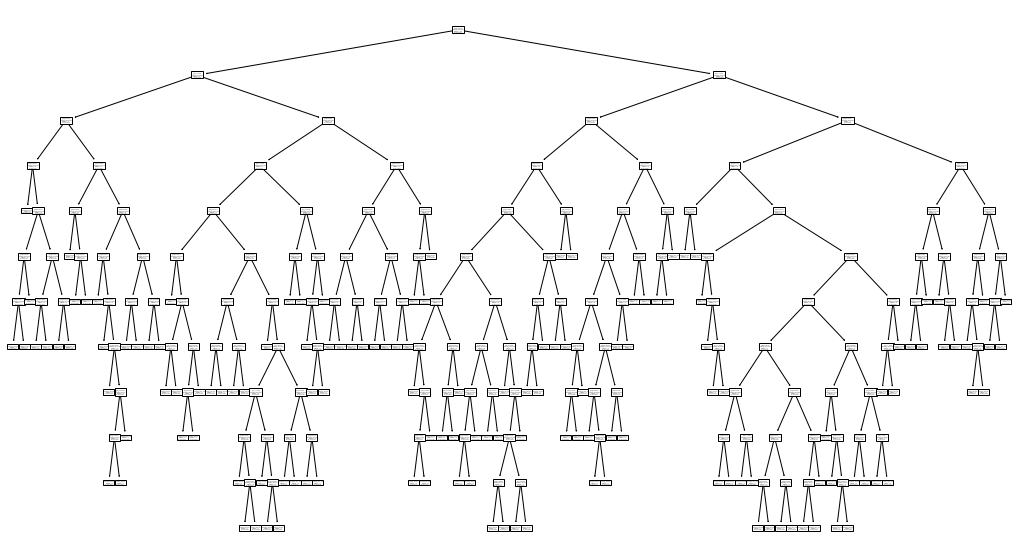

In [55]:
plt.figure(figsize=(18,10))
tree.plot_tree(regr)
plt.show()

## Support vector regression

In [56]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)).fit(X_train, y_train)

/home/tristan/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
scores = model_selection.cross_val_score(regr, X_train, y_train, cv=5)
print(scores)

[0.28623523 0.25356053 0.3292629  0.2797167  0.33332115]


/home/tristan/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tristan/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tristan/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tristan/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d

In [58]:
prediction = regr.predict(X_test)
print(r2_score(y_test, prediction))

0.3187831773417553


## Random forest

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [60]:
regr = RandomForestRegressor(max_depth=3).fit(X_train, y_train)

/tmp/ipykernel_18404/938108510.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr = RandomForestRegressor(max_depth=3).fit(X_train, y_train)


In [61]:
scores = model_selection.cross_val_score(regr, X_train, y_train, cv=5)
print(scores)

/home/tristan/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tristan/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tristan/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tristan/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selec

[0.43687712 0.38220816 0.46120479 0.49899689 0.30973117]


In [62]:
prediction = regr.predict(X_test)
print(r2_score(y_test, prediction))

0.42939446966969086


## Lasso regression

In [63]:
from sklearn import linear_model

In [64]:
lassoReg = linear_model.Lasso(alpha=0.1).fit(X_train,y_train)

In [65]:
scores = model_selection.cross_val_score(regr, X_train, y_train, cv=5)
print(scores)

/home/tristan/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tristan/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tristan/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/tristan/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selec

[0.44959586 0.34970973 0.47939565 0.52142197 0.37269919]


/home/tristan/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [66]:
prediction = regr.predict(X_test)
print(r2_score(y_test, prediction))

0.42939446966969086
